<a href="https://colab.research.google.com/github/PoornimaSathyaraj/Project1/blob/main/Part1_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 - Pre-processing and EDA

### Load the tweets dataset

In [ ]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_colwidth', 200)

In [ ]:
tweets = pd.read_csv('tweets.csv')
tweets.head()

id  label  \
0   1      0   
1   2      0   
2   3      0   
3   4      0   
4   5      1   

                                                                                                                                 tweet  
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone  
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/  
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu  
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/  
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!

In [ ]:
tweets.shape

(7920, 3)

In [ ]:
#### 0 refers to positive sentiment, 1 is negetive sentiment
#### let's map 0 as 1 and 1 as 0
tweets['label'] = tweets['label'].map({0:1, 1:0})
tweets.head()

id  label  \
0   1      1   
1   2      1   
2   3      1   
3   4      1   
4   5      0   

                                                                                                                                 tweet  
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone  
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/  
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu  
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/  
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


# Basic Exploratory Data Analysis

In [ ]:
# check for missing values
tweets.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [ ]:
# drop the id column
tweets.drop('id', axis=1, inplace=True)

In [ ]:
tweets.head()

label  \
0      1   
1      1   
2      1   
3      1   
4      0   

                                                                                                                                 tweet  
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone  
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/  
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu  
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/  
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!

In [ ]:
tweets['label'].value_counts()

label
1    5894
0    2026
Name: count, dtype: int64

In [ ]:
# Check for class balance
tweets['label'].value_counts(normalize=True)

label
1    0.744192
0    0.255808
Name: proportion, dtype: float64

<Axes: xlabel='label', ylabel='count'>

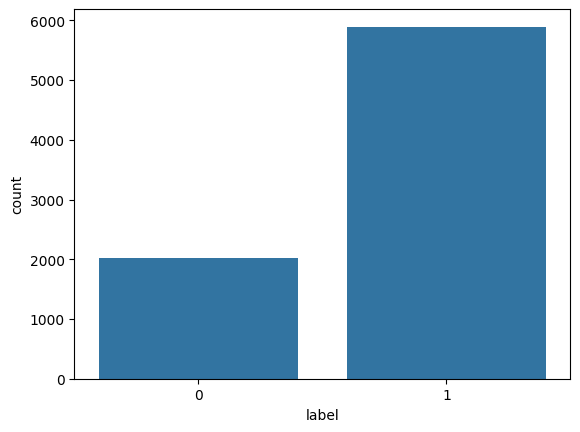

In [ ]:
import seaborn as sns
sns.countplot(data=tweets, x='label')

# Data Cleaning

In [ ]:
tweets['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [ ]:
tweets['tweet'][14]

'@shaqlockholmes @sam_louise1991 the battery is so painful! I charge it overnight and by lunchtime battery is dead! #HateOrange.'

In [ ]:
# regular expression
import re

In [ ]:
re.sub(r"'s\b", " is", tweets['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [ ]:
tweets['tweet'][11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [ ]:
# remove the user mentions
re.sub("@[A-Za-z0-9]+","",tweets['tweet'][11])

'Ha! Not heavy machinery but it does what I need it to.  really dropped the ball with that design. #drinkyourhaterade'

In [ ]:
tweets['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [ ]:
# remove hastags
re.sub("#","",tweets['tweet'][0])

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [ ]:
# remove hyperlinks
re.sub(r"http\S+","",tweets['tweet'][0])

'#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [ ]:
tweets['tweet'][25]

'1.05 billion for 3 patents where there is prior art = 300 millions each = patent trolls are partying now thanks to Apple #apple'

In [ ]:
# retain only the alphabets (get rid of punct, special char, digits)
re.sub(r"[^a-zA-Z]", " " , tweets['tweet'][25])

'     billion for   patents where there is prior art       millions each   patent trolls are partying now thanks to Apple  apple'

# Natural Language Toolkit (nltk)

In [ ]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\KUMAR
[nltk_data]    |     SUNDRAM\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\KUMAR
[nltk_data]    |     SUNDRAM\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\KUMAR
[nltk_data]    |     SUNDRAM\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\KUMAR
[nltk_data]    |     SUNDRAM\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagge

True

In [ ]:
# stopword removal
import nltk
from nltk.corpus import stopwords
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{'again', 'same', 'its', "haven't", 'because', 'or', 'can', 'me', "mightn't", "shan't", 'over', 'too', 'below', 'during', "hadn't", 'then', 'there', 'his', 'few', 'i', 'for', 'it', 'while', 'than', 'between', 'theirs', "she's", "you'd", 'him', 'is', 'when', 'isn', 'here', 'has', 'no', 'doing', 'where', 'needn', 'doesn', 'as', 'o', 'shan', 'about', 'this', 'that', "weren't", 'ours', 'these', 'off', 'an', 'don', "aren't", 'ain', 'some', 'which', 'after', 's', 'itself', 'into', 'ma', 'out', 'now', "should've", 'had', 'so', 'just', 'hadn', 'be', 'further', 'won', 'with', 'did', 'weren', "you'll", 'being', 'ourselves', 'my', 'her', "it's", 'yours', 'does', 'are', 'by', 'of', "shouldn't", 'such', "isn't", 'but', 'have', 'was', 'on', 't', 'their', "couldn't", 'very', 'at', 'in', 'didn', "hasn't", 'under', 'should', 'both', 'nor', "don't", "needn't", 'before', 'aren', 'were', 'more', 'having', 'm', 'we', 'until', 'from', 'why', 'to', 'your', 'hasn', 'own', 'he', 'd', 'haven', 'yourselves', 'an

In [ ]:
len(nltk_stopwords)

179

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'again', 'onto', 'whoever', 'another', 'ltd', 'its', 'cannot', 'therefore', 'co', 'even', 'can', 'seem', 'fifty', 'con', 'de', 'over', 'too', 'almost', 'serious', 'then', 'across', 'his', 'few', 'thence', 'whatever', 'might', 'forty', 'put', 'between', 'amount', 'thereafter', 'whose', 'system', 'upon', 'where', 'as', 'that', 'ours', 'these', 'seemed', 'an', 'six', 'mine', 'perhaps', 'some', 'itself', 'into', 'whenever', 'thereupon', 'now', 'everyone', 'anything', 'be', 'third', 'whereby', 'becomes', 'detail', 'wherever', 'my', 'indeed', 'nothing', 'sometime', 'yours', 'except', 'became', 'whither', 'are', 'beyond', 'side', 'of', 'inc', 'noone', 'without', 'however', 'keep', 'have', 'amongst', 'fire', 'meanwhile', 'on', 'neither', 'anywhere', 'please', 'very', 'in', 'seems', 'besides', 'both', 'everywhere', 'somewhere', 'before', 'wherein', 'from', 'hereafter', 'mostly', 'interest', 'also', 'along', 'together', 'sixty', 'see', 'a', 'once', 'myself', 'each', 'hereupon', 'rather', 'must'

In [ ]:
len(sklearn_stopwords)

318

In [ ]:
print(sklearn_stopwords.intersection(nltk_stopwords))

{'again', 'same', 'its', 'because', 'or', 'can', 'me', 'over', 'too', 'below', 'during', 'then', 'there', 'his', 'few', 'i', 'for', 'it', 'while', 'than', 'between', 'is', 'him', 'when', 'here', 'has', 'no', 'where', 'as', 'about', 'this', 'that', 'ours', 'these', 'off', 'an', 'some', 'which', 'after', 'itself', 'into', 'out', 'now', 'had', 'so', 'be', 'further', 'with', 'being', 'ourselves', 'my', 'her', 'yours', 'are', 'by', 'of', 'such', 'but', 'have', 'was', 'on', 'their', 'very', 'at', 'in', 'under', 'should', 'both', 'nor', 'before', 'were', 'more', 'we', 'until', 'from', 'why', 'to', 'your', 'own', 'he', 'yourselves', 'and', 'a', 'once', 'myself', 'been', 'them', 'each', 'all', 'any', 'they', 'how', 'only', 'themselves', 'other', 'do', 'through', 'those', 'down', 'above', 'most', 'the', 'if', 'our', 'up', 'herself', 'against', 'not', 'who', 'she', 'will', 'am', 'yourself', 'what', 'himself', 'whom', 're', 'hers', 'you'}


In [ ]:
len(sklearn_stopwords.intersection(nltk_stopwords))

119

In [ ]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = sklearn_stopwords.union(nltk_stopwords)

In [ ]:
179-119

60

In [ ]:
318+60

378

In [ ]:
len(combined_stopwords)

378

# Text Normalization - Stemming or Lemmatization

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('dogs')

'dog'

In [ ]:
tweets['tweet'][63]

'Gain Followers RT This MUST FOLLOW ME I FOLLOW BACK Follow everyone who rts Gain #iphone #sougofollow #ff i7si'

In [ ]:
tweets['tweet'][63].split()

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [ ]:
new_sent = ''
for token in tweets['tweet'][63].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ' '
new_sent

'gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si '

In [ ]:
# ain't - am not, are not, is not, has not , have not
# cause - because
# gonna - going to
# gotta - got have to
# i'd've - i would i would have
# mightn't've - might not have
# o'clock - of the clock


# Contractions

In [ ]:
#!pip install contractions

In [ ]:
import contractions

In [ ]:
contractions.fix("I'm bored")

'I am bored'

In [ ]:
tweets['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [ ]:
contractions.fix(tweets['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

# Define a Cleaner Function to handle all type of problem at one go -

In [ ]:
def tweet_cleaner(raw_tweet):
    """This function cleans the raw tweet """
    # substituting contractions
    cleaned_tweet = contractions.fix(raw_tweet)
    # remove the user mentions
    cleaned_tweet = re.sub("@[A-Za-z0-9]+","",cleaned_tweet)
    # remove hastags
    cleaned_tweet = re.sub("#","",cleaned_tweet)
    # remove hyperlinks
    cleaned_tweet=re.sub(r"http\S+","",cleaned_tweet)
    # retain only the alphabets (get rid of punct, special char, digits)
    cleaned_tweet = re.sub(r"[^a-zA-Z]", " " , cleaned_tweet)
    cleaned_tweet = cleaned_tweet.lower().strip()
    cleaned_tweet = [token for token in cleaned_tweet.split() if len(token)>2]
    new_sent = ''
    for token in cleaned_tweet:
        new_sent = new_sent + lemmatizer.lemmatize(token) + ' '
    return new_sent.strip()

In [ ]:
tweets['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [ ]:
tweet_cleaner(tweets['tweet'][24])

'time for new wallpaper phone wallpaper wall screen galaxy samsung app'

In [ ]:
tweets['cleaned_tweets'] = tweets['tweet'].apply(tweet_cleaner)

In [ ]:
tweets.head()

label  \
0      1   
1      1   
2      1   
3      1   
4      0   

                                                                                                                                 tweet  \
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone   
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/   
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu   
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/   
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!   

                                                                                               cleaned_tweets  
0             fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone  
1                                  finally transparant silicon case thanks uncle yay sony xperia sonyexperias  
2                           love this would you talk makememories unplug relax iphone smartphone wifi connect  
3                                                wired know george wa made that way iphone cute daventry home  
4  what amazing service apple will not even talk about question have unless pay them for their stupid support

In [ ]:
tweets.tail(10)

label  \
7910      1   
7911      1   
7912      1   
7913      0   
7914      1   
7915      1   
7916      1   
7917      1   
7918      1   
7919      1   

                                                                                                                                       tweet  \
7910       Perfect match #instagood #applewatch #red #instagram #iphone #picoftheday #gay #fashion… https://www.instagram.com/p/BPBDUMEAQgb/   
7911                                                              I am completely in love with the new iPhone emojis!! #iPhone #apple #emojs   
7912                             Tune in. Turn on. Drop out. & #GTD in one app! http://bit.ly/cebF6 #mobile #mind #meditate #opensit #iphone   
7913                        Ok so my galaxy crashed after one day now I have to wait til Monday for my skyrocket but using iPhone for now...   
7914                              Gain Followers RT This MUST FOLLOW ME I FOLLOW BACK Follow everyone who rts Gain #iphone #sougofollow 1ö[q   
7915                             Live out loud #lol #liveoutloud #selfie #smile #sony #music #headphones https://instagram.com/p/5spiNsJ_c9/   
7916  We would like to wish you an amazing day! Make every minute count #tls #today #iphone #accessories #news #life February 23, 2017 at 0…   
7917       Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that 'I' don't actually need an I pad!   
7918   Finally got my #smart #pocket #wifi stay connected anytime,anywhere! #ipad and #samsung #s3 #gadget # http://instagr.am/p/U-53G_vJU8/   
7919       Apple Barcelona!!! #Apple #Store #BCN #Barcelona #travel #iphone #selfie #fly #fun #cabincrew… http://instagram.com/p/wBApVzpCl3/   

                                                                                                   cleaned_tweets  
7910                              perfect match instagood applewatch red instagram iphone picoftheday gay fashion  
7911                                                completely love with the new iphone emojis iphone apple emojs  
7912                                           tune turn drop out gtd one app mobile mind meditate opensit iphone  
7913                 galaxy crashed after one day now have wait til monday for skyrocket but using iphone for now  
7914                   gain follower this must follow follow back follow everyone who rts gain iphone sougofollow  
7915                                              live out loud lol liveoutloud selfie smile sony music headphone  
7916         would like wish you amazing day make every minute count tl today iphone accessory news life february  
7917  helping lovely year old neighbor with her ipad this morning ha just made realise that not actually need pad  
7918                        finally got smart pocket wifi stay connected anytime anywhere ipad and samsung gadget  
7919                             apple barcelona apple store bcn barcelona travel iphone selfie fly fun cabincrew

# Data Visialization

In [ ]:
# Create a python list of all the words from all the tweets
vocab_raw = []
for tweet in tweets['tweet']:
    vocab_raw.extend(tweet.split())
print(vocab_raw)

['#fingerprint', '#Pregnancy', 'Test', 'https://goo.gl/h1MfQV', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers', '#iphoneonly', '#iphonesia', '#iphone', 'Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':)', '#yay', '#Sony', '#Xperia', '#S', '#sonyexperias…', 'http://instagram.com/p/YGEt5JC6JM/', 'We', 'love', 'this!', 'Would', 'you', 'go?', '#talk', '#makememories', '#unplug', '#relax', '#iphone', '#smartphone', '#wifi', '#connect...', 'http://fb.me/6N3LsUpCu', "I'm", 'wired', 'I', 'know', "I'm", 'George', 'I', 'was', 'made', 'that', 'way', ';)', '#iphone', '#cute', '#daventry', '#home', 'http://instagr.am/p/Li_5_ujS4k/', 'What', 'amazing', 'service!', 'Apple', "won't", 'even', 'talk', 'to', 'me', 'about', 'a', 'question', 'I', 'have', 'unless', 'I', 'pay', 'them', '$19.95', 'for', 'their', 'stupid', 'support!', 'iPhone', 'software', 'update', 'fucked', 'up', 'my', 'phone', 'big', 'time', 'Stupid', 'iPhones', 'Happy', 'for', 'us', 

In [ ]:
len(vocab_raw)

133400

In [ ]:
vocab_raw = [token for tweet in tweets['tweet'] for token in tweet.split()]
#print(vocab_raw)

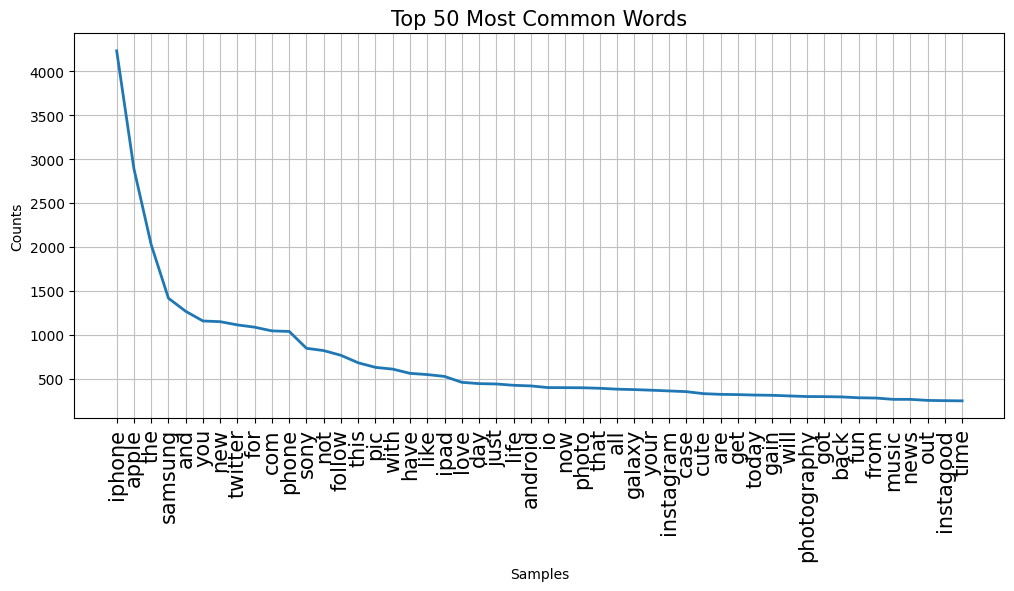

In [ ]:
import matplotlib.pyplot as plt
# Frequency distribution of the words
freq_dist = nltk.FreqDist(vocab_raw)
plt.figure(figsize=(12,5))
plt.title("Top 50 Most Common Words", fontsize=15)
plt.xticks(fontsize=15)
freq_dist.plot(50, cumulative=False)
plt.show()

In [ ]:
freq_dist

FreqDist({'iphone': 4231, 'apple': 2890, 'the': 2025, 'samsung': 1416, 'and': 1267, 'you': 1157, 'new': 1149, 'twitter': 1112, 'for': 1086, 'com': 1044, ...})

# Freq Dist plot for cleaned_tweets

In [ ]:
vocab_raw = [token for tweet in tweets['cleaned_tweets'] for token in tweet.split()]
print(vocab_raw)

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'this', 'would', 'you', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'wa', 'made', 'that', 'way', 'iphone', 'cute', 'daventry', 'home', 'what', 'amazing', 'service', 'apple', 'will', 'not', 'even', 'talk', 'about', 'question', 'have', 'unless', 'pay', 'them', 'for', 'their', 'stupid', 'support', 'iphone', 'software', 'update', 'fucked', 'phone', 'big', 'time', 'stupid', 'iphones', 'happy', 'for', 'instapic', 'instadaily', 'sony', 'xperia', 'xperiaz', 'new', 'type', 'charger', 'cable', 'bay', 'amazon', 'etsy', 'new', 'year', 'rob', 'cross', 'toby', 'young', 'evemun', 'mcmafia', 'taylor', 'spectre', 'newyear', 'starting', 'recipe', 'technology', 'samsunggalaxys', 'iphonex', 'pic'

In [ ]:
len(vocab_raw)

106654

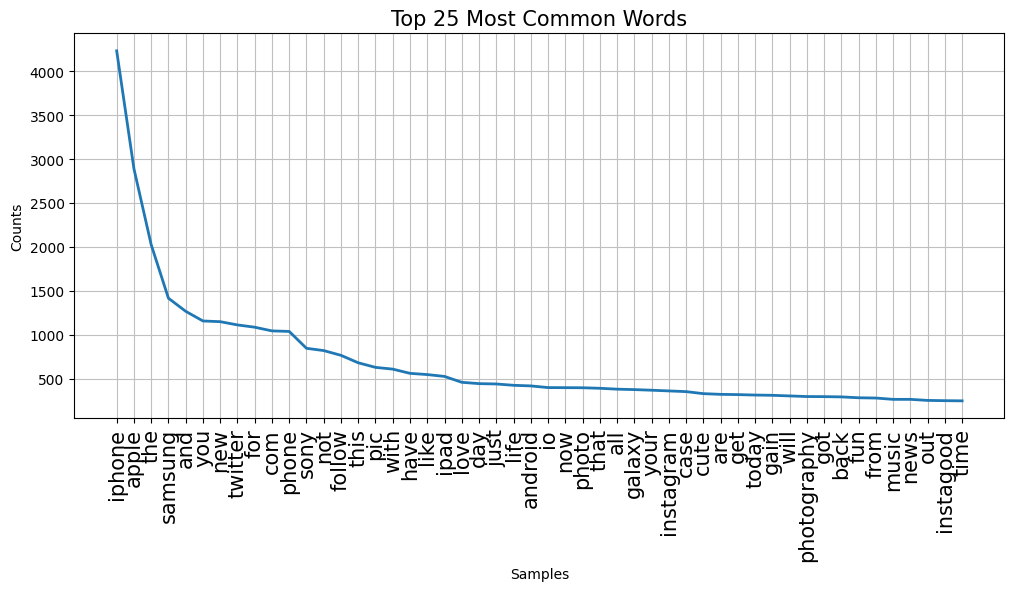

In [ ]:
import matplotlib.pyplot as plt
# Frequency distribution of the words
freq_dist = nltk.FreqDist(vocab_raw)
plt.figure(figsize=(12,5))
plt.title("Top 25 Most Common Words", fontsize=15)
plt.xticks(fontsize=15)
freq_dist.plot(50, cumulative=False)
plt.show()

In [ ]:
freq_dist

FreqDist({'iphone': 4231, 'apple': 2890, 'the': 2025, 'samsung': 1416, 'and': 1267, 'you': 1157, 'new': 1149, 'twitter': 1112, 'for': 1086, 'com': 1044, ...})

In [ ]:
combined_stopwords

{'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'ain',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'aren',
 "aren't",
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bill',
 'both',
 'bottom',
 'but',
 'by',
 'call',
 'can',
 'cannot',
 'cant',
 'co',
 'con',
 'could',
 'couldn',
 "couldn't",
 'couldnt',
 'cry',
 'd',
 'de',
 'describe',
 'detail',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'done',
 'down',
 'due',
 'during',
 'each',
 'eg',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'etc',
 'even',
 'ever',
 

# Freq Dist plot for cleaned tweets, after removing stopwords

In [ ]:
domain_stopwords = {'twitter','com','io','iO','IO','i0','instagram','facebook','rt'}
domain_stopwords

{'IO', 'com', 'facebook', 'i0', 'iO', 'instagram', 'io', 'rt', 'twitter'}

In [ ]:
combined_stopwords = combined_stopwords.union(domain_stopwords)
len(combined_stopwords)

387

In [ ]:
def tweet_cleaner_with_stopwords(raw_tweet):
    """This function cleans the raw tweet """
    # substituting contractions
    cleaned_tweet = contractions.fix(raw_tweet)
    # remove the user mentions
    cleaned_tweet = re.sub("@[A-Za-z0-9]+","",cleaned_tweet)
    # remove hastags
    cleaned_tweet = re.sub("#","",cleaned_tweet)
    # remove hyperlinks
    cleaned_tweet=re.sub(r"http\S+","",cleaned_tweet)
    # retain only the alphabets (get rid of punct, special char, digits)
    cleaned_tweet = re.sub(r"[^a-zA-Z]", " " , cleaned_tweet)
    cleaned_tweet = cleaned_tweet.lower().strip()
    # remove stopwords from the new_sent
    cleaned_tweet = [token for token in cleaned_tweet.split() if token not in combined_stopwords]
    # Retain only those token which have length > 2 characters
    cleaned_tweet = [token for token in cleaned_tweet if len(token)>2]
    new_sent = ''
    for token in cleaned_tweet:
        new_sent = new_sent + lemmatizer.lemmatize(token) + ' '
    return new_sent.strip()

In [ ]:
tweets["cleaned_tweets_without_stopwords"] = tweets['tweet'].apply(tweet_cleaner_with_stopwords)
tweets.head()

label  \
0      1   
1      1   
2      1   
3      1   
4      0   

                                                                                                                                 tweet  \
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone   
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/   
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu   
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/   
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!   

                                                                                               cleaned_tweets  \
0             fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone   
1                                  finally transparant silicon case thanks uncle yay sony xperia sonyexperias   
2                           love this would you talk makememories unplug relax iphone smartphone wifi connect   
3                                                wired know george wa made that way iphone cute daventry home   
4  what amazing service apple will not even talk about question have unless pay them for their stupid support   

                                                                  cleaned_tweets_without_stopwords  
0  fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone  
1                       finally transparant silicon case thanks uncle yay sony xperia sonyexperias  
2                               love talk makememories unplug relax iphone smartphone wifi connect  
3                                                  wired know george way iphone cute daventry home  
4                                    amazing service apple talk question unless pay stupid support

In [ ]:
vocab_raw1 = [token for tweet in tweets['cleaned_tweets_without_stopwords'] for token in tweet.split()]
print(vocab_raw1)

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'way', 'iphone', 'cute', 'daventry', 'home', 'amazing', 'service', 'apple', 'talk', 'question', 'unless', 'pay', 'stupid', 'support', 'iphone', 'software', 'update', 'fucked', 'phone', 'big', 'time', 'stupid', 'iphones', 'happy', 'instapic', 'instadaily', 'sony', 'xperia', 'xperiaz', 'new', 'type', 'charger', 'cable', 'bay', 'amazon', 'etsy', 'new', 'year', 'rob', 'cross', 'toby', 'young', 'evemun', 'mcmafia', 'taylor', 'spectre', 'newyear', 'starting', 'recipe', 'technology', 'samsunggalaxys', 'iphonex', 'pic', 'pjiwq', 'wtc', 'bout', 'shopping', 'listening', 'music', 'iphone', 'justme', 'music', 'likeforlike', 'followforfollow', 'p

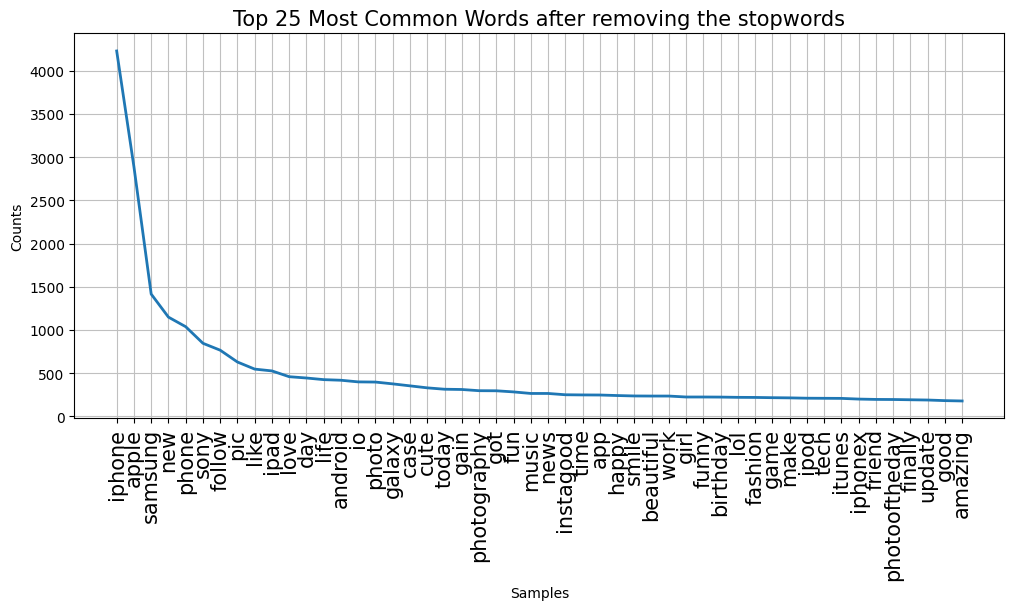

In [ ]:
import matplotlib.pyplot as plt
# Frequency distribution of the words
freq_dist = nltk.FreqDist(vocab_raw1)
plt.figure(figsize=(12,5))
plt.title("Top 25 Most Common Words after removing the stopwords", fontsize=15)
plt.xticks(fontsize=15)
freq_dist.plot(50, cumulative=False)
plt.show()

In [ ]:
freq_dist

FreqDist({'iphone': 4231, 'apple': 2890, 'samsung': 1416, 'new': 1149, 'phone': 1038, 'sony': 846, 'follow': 766, 'pic': 629, 'like': 547, 'ipad': 526, ...})

# Create word clouds for better visualization (text data)

In [ ]:
#!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
text = """
The latest retail inflation data from the National Statistical Office yet again highlights the challenge in achieving durable price stability. Provisional estimates for year-on-year price gains in August show the headline rate based on the Consumer Price Index (CPI) quickened marginally to 3.65%, from July’s 3.60%, as a sharp rebound in vegetable inflation led to a wider acceleration in overall food price gains. Price gains in vegetables — the third-largest constituent of the Consumer Food Price Index — surged by more than 380 basis points last month to 10.7%, spurring food price inflation to 5.66%. Among vegetables, year-on-year inflation in the most widely consumed potato and onion still remained in the high double digits for a sixth and 13th month at 64% and 54%, respectively, a moderation from July’s levels notwithstanding. Other vegetables including carrot, palak and brinjal experienced a surge in price gains with all three posting double-digit inflation. Also, disinflation in the prices of pulses and cereals remained slow, with year-on-year price gains in the former still in the double digits for a 15th straight month at 13.6%, while the latter logged an inflation reading of 7.3%. Disconcertingly, food inflation in the rural areas rebounded to exceed 6%, and this at a time when stuttering private consumption is trying to regain momentum in the economically crucial agrarian hinterland. As an external member of the Monetary Policy Committee Shashanka Bhide noted in his comments at the RBI’s policy review meeting last month, “high food inflation would therefore hit growth adversely as it affects consumption”.

A durable disinflation to the RBI’s medium-term monetary policy goal of 4% headline retail inflation also faces other challenges, a key element being a resurgence in core inflation. The price gains measure, which strips out the more volatile food and fuel components, inched up to 3.38% after having snapped a 17-month decelerating streak in July. Based on responses from goods manufacturers polled for the monthly HSBC India Manufacturing PMI survey, HSBC observed this month that there was a “marked increase in prices charged for goods in August” with the rate of output-charge inflation the second-fastest in close to 11 years. Add to this the spatial and temporal volatility of the monsoon, and the outlook for price stability becomes even more muddied. RBI Governor Shaktikanta Das on Friday said that the last mile of disinflation was proving to be “challenging”. With policymakers still having to traverse a fair distance to ensure inflation does not undermine broader economic momentum, he reassuringly acknowledged that authorities “cannot afford to look the other way”.



"""
text

'\nThe latest retail inflation data from the National Statistical Office yet again highlights the challenge in achieving durable price stability. Provisional estimates for year-on-year price gains in August show the headline rate based on the Consumer Price Index (CPI) quickened marginally to 3.65%, from July’s 3.60%, as a sharp rebound in vegetable inflation led to a wider acceleration in overall food price gains. Price gains in vegetables — the third-largest constituent of the Consumer Food Price Index — surged by more than 380 basis points last month to 10.7%, spurring food price inflation to 5.66%. Among vegetables, year-on-year inflation in the most widely consumed potato and onion still remained in the high double digits for a sixth and 13th month at 64% and 54%, respectively, a moderation from July’s levels notwithstanding. Other vegetables including carrot, palak and brinjal experienced a surge in price gains with all three posting double-digit inflation. Also, disinflation in 

In [ ]:
wordcloud = WordCloud(stopwords = combined_stopwords)
wordcloud.generate(text)

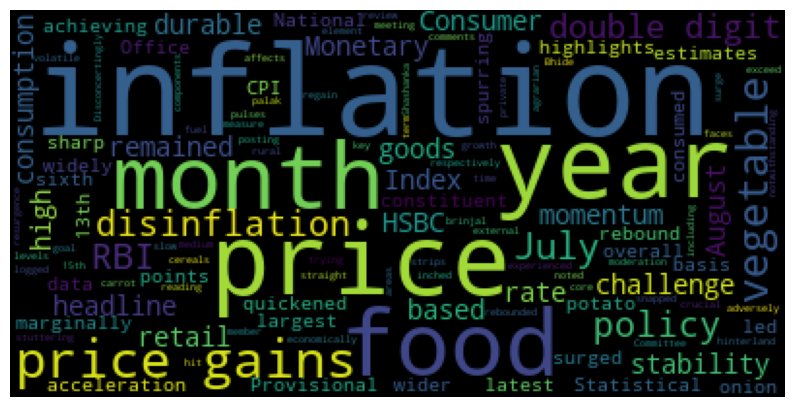

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

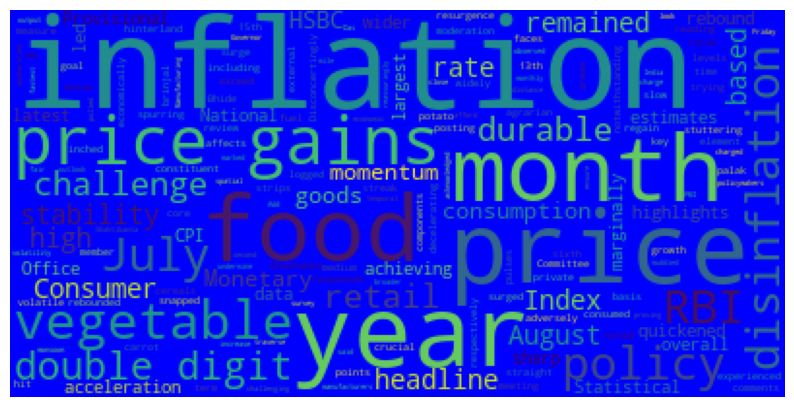

In [ ]:
wordcloud = WordCloud(stopwords = combined_stopwords, background_color='blue', \
                     contour_width=3, contour_color='steelblue')
wordcloud.generate(text)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# Saving the cleaned dataset for further text/sentiment analysis
tweets.to_pickle("cleaned_tweets_v1.pkl")